# Статистический анализ террористических актов в разных странах 

### Цель работы: 
Выявить ключевые закономерности, связанные с террористическими актами в разных странах.  

### Формулировка гипотез:
1. Количество террористических актов значительно увеличилось после 2000-х годов.  
2. Количество террористических атак зависит от опреленного месяца. 
3. Географическое распределение атак неравномерно и сосредоточено в определенных регионах. 
4. Наибольшее количество жертв среди всех возможных целевых типов наблюдается при целевом типе "Частные лица".

### Задачи:
1.	Просмотреть данные по террористическим актам и провести их предобработку для последующего анализа. 
2.	Проанализировать временные тенденции и сезонные колебания в количестве террористических атак и жертв.
3.	Проанализировать географическое распределение террористических актов и сравнить страны по числу атак и жертв.
4.	Проанализировать корреляцию между ключевыми параметрами атак, такими как количество раненых и погибших.
5.  Проанализировать количество жертв при разных целевых типах.
6.	Просмотреть и обобщить результаты для выявления закономерностей и подтверждения гипотез исследования.  

## Просмотр и предобработка данных

In [1]:
%pip install folium matplotlib mapclassify
# Импортирование библиотек 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import spearmanr, pearsonr
from statsmodels.stats.multitest import multipletests
from scipy.stats import f_oneway
import scipy
from sklearn.linear_model import LinearRegression

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Считываем данные 
nRowsRead = None
data = pd.read_csv('data/globalterrorismdb_0718dist.csv', delimiter=',', nrows = nRowsRead)

/var/folders/qr/ypj5b9n969ld329wbbvkklnr0000gn/T/ipykernel_57734/3541243446.py:3: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/globalterrorismdb_0718dist.csv', delimiter=',', nrows = nRowsRead)


In [3]:
# Первые пять строк датасета
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Для удобства переименуем некоторые столбцы

In [4]:
data.rename(columns= {'eventid': 'Id', 'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                   'region_txt':'Region','attacktype1_txt':'AttackType', 'nkill':'Killed','nwound':'Wounded',
                   'targtype1_txt':'Target_type'},inplace=True)
data.head()

,Id,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Оставляем только нужные нам столбцы

In [5]:
data = data[['Id', 'Year','Month','Day', 'latitude', 'longitude', 'Country', 'Region','AttackType', 'Killed','Wounded','Target_type']]
data.head()

,Id,Year,Month,Day,latitude,longitude,Country,Region,AttackType,Killed,Wounded,Target_type
0,197000000001,1970,7,2,18.456792,-69.951164,Dominican Republic,Central America & Caribbean,Assassination,1.0,0.0,Private Citizens & Property
1,197000000002,1970,0,0,19.371887,-99.086624,Mexico,North America,Hostage Taking (Kidnapping),0.0,0.0,Government (Diplomatic)
2,197001000001,1970,1,0,15.478598,120.599741,Philippines,Southeast Asia,Assassination,1.0,0.0,Journalists & Media
3,197001000002,1970,1,0,37.997490,23.762728,Greece,Western Europe,Bombing/Explosion,NaN,NaN,Government (Diplomatic)
4,197001000003,1970,1,0,33.580412,130.396361,Japan,East Asia,Facility/Infrastructure Attack,NaN,NaN,Government (Diplomatic)


Посмотрим все уникальные значения в столбце Target_type:

In [6]:
target_types = data['Target_type'].unique()
target_types

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [7]:
# Просматриваем инфу о столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Id           181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Month        181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   latitude     177135 non-null  float64
 5   longitude    177134 non-null  float64
 6   Country      181691 non-null  object 
 7   Region       181691 non-null  object 
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target_type  181691 non-null  object 
dtypes: float64(4), int64(4), object(4)
memory usage: 16.6+ MB


In [8]:
# Процент строк без данных
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

Id             0.000000
Year           0.000000
Month          0.000000
Day            0.000000
latitude       2.507554
longitude      2.508104
Country        0.000000
Region         0.000000
AttackType     0.000000
Killed         5.676120
Wounded        8.977330
Target_type    0.000000
dtype: float64

In [9]:
# Подставляем среднее значение вместо пустых
mean_fill_killed = data['Killed'].mean()
mean_fill_wounded = data['Wounded'].mean()

In [10]:
data = data.fillna({'Killed': mean_fill_killed})
data = data.fillna({'Wounded': mean_fill_wounded})

In [11]:
# Удалим строки с NaN в столбце AttackType
data = data.dropna(subset=['AttackType'])


In [12]:
df = data.copy()
percent_missing = df.isnull().sum() * 100 / len(data)
percent_missing

Id             0.000000
Year           0.000000
Month          0.000000
Day            0.000000
latitude       2.507554
longitude      2.508104
Country        0.000000
Region         0.000000
AttackType     0.000000
Killed         0.000000
Wounded        0.000000
Target_type    0.000000
dtype: float64

In [13]:
# Создаем AttackTypeNum
unique_attack_types = df['AttackType'].unique()
attack_type_mapping = {value: i for i, value in enumerate(unique_attack_types)}
df['AttackTypeNum'] = df['AttackType'].map(attack_type_mapping)

## 1. Временной анализ данных

Проведем анализ временных тенденций и сезонных колебаний в количестве террористических атак и жертв.

### Диаграмма, показывающая количество террористических атак за каждый год.

In [14]:
# Подсчет количества атак в каждом году и сортировка по возрастанию
attacks_per_year = df['Year'].value_counts().sort_index()

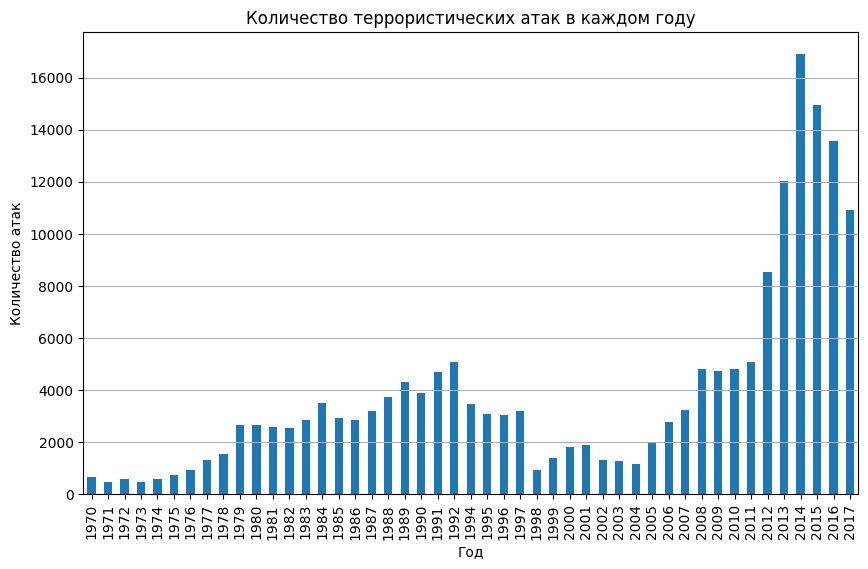

In [15]:
# Создание новой фигуры с заданными размерами
plt.figure(figsize=(10, 6)) 

# Создание столбчатой диаграммы с использованием данных attacks_per_year и заданными цветами
attacks_per_year.plot(kind='bar')

# Добавление заголовка к графику
plt.title('Количество террористических атак в каждом году')

# Добавление подписей осей
plt.xlabel('Год')
plt.ylabel('Количество атак')

# Добавление сетки на ось Y для лучшей читаемости
plt.grid(axis='y')

# Отображение графика
plt.show()

### Диаграмма для сравнения количества погибших и пострадавших по годам.

In [16]:
# Группировка данных по году и суммирование убитых и раненых
yearly_casualties = df.groupby('Year')[['Killed', 'Wounded']].sum()

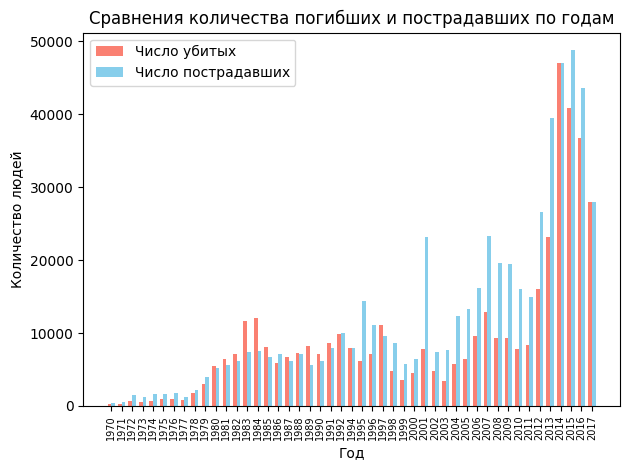

In [17]:
# Определение ширины столбцов и индекса для оси X
bar_width = 0.35
index = np.arange(len(yearly_casualties))

# Создание столбчатой диаграммы с использованием данных yearly_casualties
plt.bar(index, yearly_casualties['Killed'], bar_width, label='Число убитых', color='salmon')
plt.bar(index + bar_width, yearly_casualties['Wounded'], bar_width, label='Число пострадавших', color='skyblue')

# Добавление подписей осей и заголовка графика
plt.xlabel('Год')
plt.ylabel('Количество людей')
plt.title('Сравнения количества погибших и пострадавших по годам')

# Настройка меток оси X с поворотом текста на 90 градусов для лучшей читаемости
plt.xticks(index + bar_width / 2, yearly_casualties.index, rotation=90, fontsize=7)

# Добавление легенды
plt.legend()

# Автоматическое расположение элементов в фигуре
plt.tight_layout()

# Отображение графика
plt.show()

### Диаграмма частоты атак по месяцам

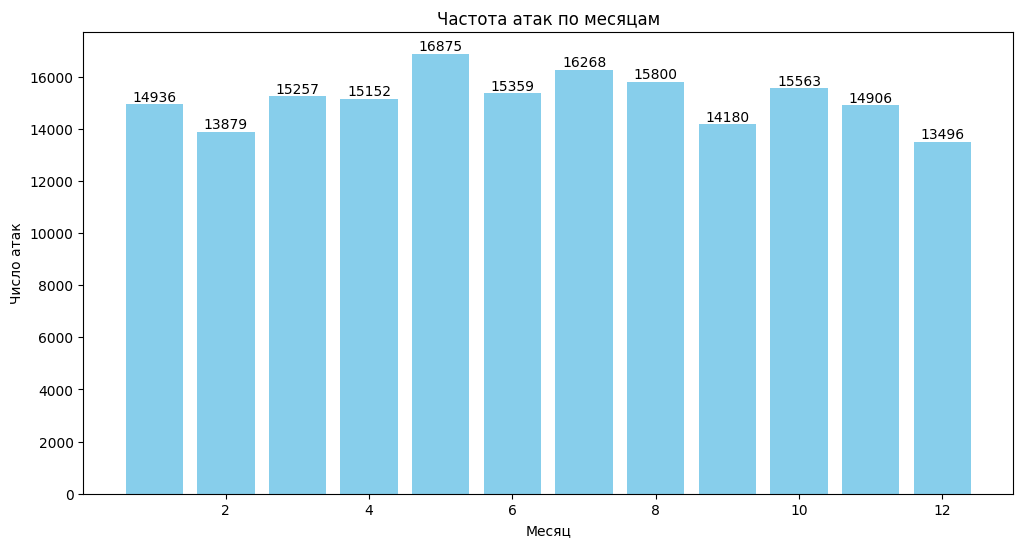

In [18]:
# Подсчет количества атак в каждом месяце и сортировка по возрастанию
monthly_attacks = df['Month'].value_counts().sort_index()

# Фильтрация значений, где Month=0
monthly_attacks_filtered = monthly_attacks[monthly_attacks.index != 0]

# Создание новой фигуры с заданными размерами
plt.figure(figsize=(12, 6))

# Создание столбчатой диаграммы с использованием отфильтрованных данных
plt.bar(monthly_attacks_filtered.index, monthly_attacks_filtered.values, color='skyblue')

# Добавление заголовка к графику
plt.title('Частота атак по месяцам')

# Добавление подписей осей
plt.xlabel('Месяц')
plt.ylabel('Число атак')

# Добавление текста над столбцами с количеством атак
for i, v in enumerate(monthly_attacks_filtered.values):
    plt.text(i+1, v, str(v), ha='center', va='bottom')

# Отображение графика
plt.show()


На основе анализа полученных графиков можно сделать следующие ключевые выводы:
- Стабильный рост количества жертв со временем: данные показывают устойчивое увеличение числа жертв с течением времени.
- Изменение пропорций жертв и пострадавших: с 1980 по 1991 год наблюдалось преобладание числа жертв над пострадавшими.
- Переход в преобладание пострадавших над жертвами: в период с 1992 по 2016 год наблюдается значительное снижение соотношения жертв к пострадавшим.
- Сезонные тенденции: не было обнаружено никакой зависимости атак от месяца


### Проверим гипотезы

#### Гипотеза 1. Количество террористических актов значительно увеличилось после 2000-х годов.  

In [19]:
# Группируем данные по годам
df_grouped_year = df.groupby('Year')
count_per_year = df_grouped_year.size().reset_index()
count_per_year.columns = ['Year', 'Count']

In [20]:
# Анализ данных
pre_2000 = count_per_year[count_per_year['Year'] < 2000]
post_2000 = count_per_year[count_per_year['Year'] >= 2000]

print(f"Среднее количество актов до 2000 года: {pre_2000['Count'].mean():.2f}")
print(f"Среднее количество актов после 2000 года: {post_2000['Count'].mean():.2f}")

print(f"Количество актов до 2000 года: {len(pre_2000)}")
print(f"Количество актов после 2000 года: {len(post_2000)}")

# Проверка гипотезы о увеличении количества актов после 2000-х
t_statistic, p_value = stats.ttest_ind(pre_2000['Count'], post_2000['Count'])
print(f"T-статистика: {t_statistic:.3f}, P-значение: {p_value:.3f}")

Среднее количество актов до 2000 года: 2408.14
Среднее количество актов после 2000 года: 6214.17
Количество актов до 2000 года: 29
Количество актов после 2000 года: 18
T-статистика: -3.745, P-значение: 0.001


Статистический анализ
- T-статистика равна -3.745, что указывает на существенное различие между средними значениями количества актов до и после 2000 года.
- P-значение 0.001 очень низкое, что подтверждает статистическую значимость наблюдаемого эффекта. Это означает, что шансы на получение такого результата при отсутствии реального различия между группами очень малы.

#### Выводы

- Гипотеза о том, что количество террористических актов значительно увеличилось после 2000-х годов, подтверждается данными. Среднее количество актов после 2000 года в более чем двое превышает среднее значение до этого периода.
- Статистический тест показывает высокую степень уверенности в том, что наблюдаемое увеличение количества актов после 2000 года не является случайным.
- Причины такого увеличения могут быть связаны с множеством факторов, включая геополитические изменения, технологические прогресс, социально-экономические условия и другие.
- Ограничение выборки (меньше актов после 2000 года) может повлиять на точность результатов.

#### 2. Количество террористических атак зависит от опреленного месяца. 

In [21]:
# Группировка по году и месяцу
df_grouped_year_month = df.groupby([df['Year'], df['Month']])

# Подсчет количества атак
attack_counts = df_grouped_year_month['Id'].nunique().reset_index()
attack_counts.columns = ['Year', 'Month', 'Count']

# Тест корреляции
month_dummies = pd.get_dummies(df['Month'], prefix='month')
X = month_dummies
y = df['Killed']

# Выполняем тест корреляции и выводим результаты
print("Корреляционные коэффициенты:")
correlations = {}
for col in X.columns:
    corr, _ = pearsonr(X[col], y)
    correlations[col] = corr
    print(f"{col}: {corr}")

Корреляционные коэффициенты:
month_0: -0.000871587299683239
month_1: -0.004216230155372033
month_2: -0.001922616151236217
month_3: -0.00463858100683402
month_4: 0.0007466326129017578
month_5: -0.0011961628917322349
month_6: 0.0053739350952830235
month_7: 0.00267290014590822
month_8: 0.004083316874699249
month_9: 0.0038838618248669566
month_10: -0.000232342711311277
month_11: -0.005332026485384734
month_12: 0.0006976772450224665


- Многие корреляционные коэффициенты близки к нулю (например, -0.000871587299683239, 0.0007466326129017578), что указывает на слабую или отсутствующую корреляцию.
- Некоторые коэффициенты имеют противоположные знаки (например, month_0: -0.004216230155372033, month_6: 0.0053739350952830235), что может указывать на неоднородность в влиянии разных месяцев.
- Максимальное абсолютное значение корреляционного коэффициента составляет около 0.005, что является очень слабой корреляцией по шкалу Spearman.

- Это очень низкая оценка R-squared, которая указывает на то, что модель плохо объясняет вариацию в зависимой переменной.
- Значение 0.00013067877540562378 можно интерпретировать как:
Только 0.013% вариации в зависимой переменной (количество убитых) объясняется независимыми переменными (месяц).

#### Выводы

- В целом, данные показывают слабую или отсутствующую общую связь между месяцем и количеством убитых в террористических атаках. Пэтому гипотезу можно опровергнуть.
- Слабая связь между месяцем и количеством убитых: корреляционные коэффициенты близки к нулю или имеют небольшие значения, что указывает на отсутствие сильной зависимости между месяцем и количеством убитых в террористических атаках.

## 2. Географический анализ данных

Проанализируем географическое распределение террористических актов и сравним страны по числу атак и жертв.

### Диаграмма распределение количества разных видов атак

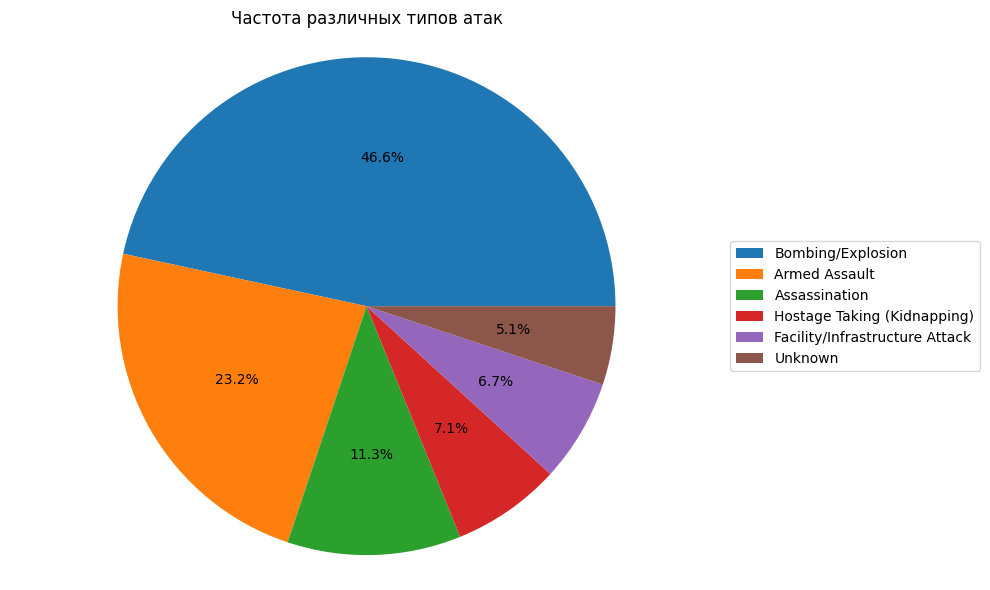

In [23]:
# Получаем уникальные значения AttackType и создаем список
attack_types = df['AttackType'].unique()
attack_counts = df['AttackType'].value_counts()

# Выбираем топ 6 атак
top_6 = attack_counts.nlargest(6).index

# Объединяем остальные атаки в "Other"
other_count = attack_counts[~attack_counts.index.isin(top_6)].sum()
other_index = len(top_6)

# Создаем список для графика
labels = top_6

# Визуализация
plt.figure(figsize=(10,6)) 
sizes = attack_counts[top_6] + [other_count]
patches, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Частота различных типов атак')

# Удаляем подписи с графика
for text in texts:
    text.set_visible(False)

# Добавляем легенду
plt.legend(patches, [t.get_text() for t in texts], loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.tight_layout()
plt.show()


### Диаграмма частоты атак по регионам

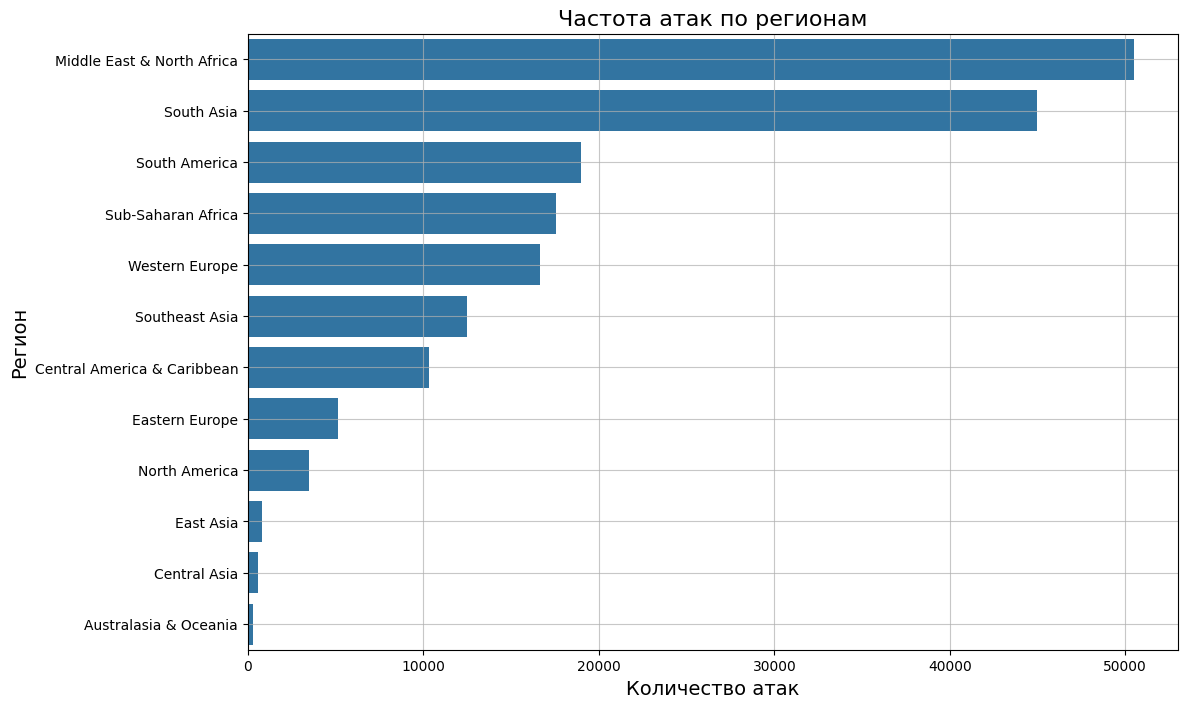

In [24]:
region_counts = df['Region'].value_counts()

# Создаем график
plt.figure(figsize=(12, 8))
sns.barplot(x=region_counts.values, y=region_counts.index)

# Добавляем заголовок и метки осей
plt.title('Частота атак по регионам', fontsize=16)
plt.xlabel('Количество атак', fontsize=14)
plt.ylabel('Регион', fontsize=14)

# Добавляем сетку
plt.grid(alpha=0.7)

plt.show()

### Диаграмма частоты атак по странам

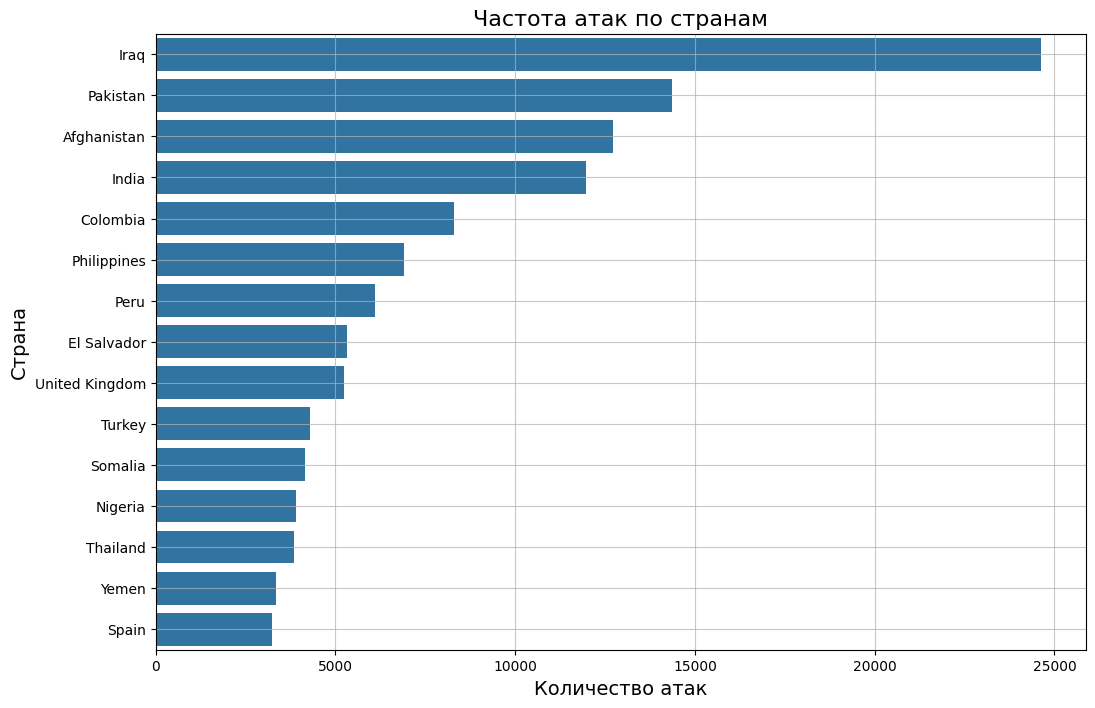

In [25]:
country_counts = df['Country'].value_counts()
# Получаем топ-15 стран по количеству атак
top_15_countries = country_counts.nlargest(15).index.tolist()
# Фильтруем исходный DataFrame
df_filtered = df[df['Country'].isin(top_15_countries)]

# Считаем количество атак в каждом регионе для отфильтрованного набора данных
country_counts_filtered = df_filtered['Country'].value_counts()
# Создаем график
plt.figure(figsize=(12, 8))
sns.barplot(x=country_counts_filtered.values, y=country_counts_filtered.index)

# Добавляем заголовок и метки осей
plt.title('Частота атак по странам', fontsize=16)
plt.xlabel('Количество атак', fontsize=14)
plt.ylabel('Страна', fontsize=14)

# Добавляем сетку
plt.grid(alpha=0.7)

Были выделены топ-15 стран по количеству атак отдельным графиком для более детального анализа.
На основе анализа полученных графиков можно сделать следующие ключевые выводы:
- Наиболее частые атаки происходят в определенных регионах, которые занимают верхние позиции в списке.
- Есть 2 региона, где наблюдается высокая концентрация атак, а другие она значительно ниже.
- Атаки не распределены равномерно по всему миру. Некоторые регионы и страны подвергаются значительно большему риску, чем другие.
- Страна с самым высоким показателем количества атак Ирак: почти 25 тысяч

#### Гипотеза 3. Географическое распределение атак неравномерно и сосредоточено в определенных регионах. 

In [26]:
# Группируем данные по регионам и подсчитываем количество атак
region_counts = df.groupby('Region').size()

# Анализ распределения
print("Анализ данных об атаках по регионам\n", region_counts.describe())

Анализ данных об атаках по регионам
 count       12.000000
mean     15140.916667
std      16696.919414
min        282.000000
25%       2792.500000
50%      11414.500000
75%      17907.000000
max      50474.000000
dtype: float64


In [27]:
regions = df.groupby('Region')
p_values = []

for region, group in regions:
    _, p_value = f_oneway(*[group[col] for col in ['Killed', 'Wounded']])
    p_values.append(p_value)

print("ANOVA p-values:", p_values)

ANOVA p-values: [np.float64(0.04872665759576004), np.float64(9.308853586886551e-55), np.float64(0.2116710147892999), np.float64(0.14591789174855233), np.float64(4.580007337603425e-05), np.float64(2.35131091746701e-69), np.float64(0.1562197905860801), np.float64(1.27896456574354e-22), np.float64(2.145071252798075e-40), np.float64(2.897277791299632e-28), np.float64(8.356436281193145e-05), np.float64(2.35519620863978e-33)]


### Выводы

- ANOVA-тест показывает, что различия в количестве убитых и раненых между регионами статистически значимы (p < 0.05) для большинства регионов. Это подтверждает гипотезу о неравномерном географическом распределении атак.
- Из ANOVA p-values мы можем определить, какие регионы имеют наибольшее влияние:
    1. Центральная Америка и Карибы (p = 4.126512122927295e-05)
    2. Юго-Восточная Азия (p = 3.9754217072799705e-71)
    3. Северная Африка (p = 1.4457552313750294e-16)
    4. Южная Азия (p = 1.6188262743810947e-40)
    5. Юго-Восточная Азия (p = 2.539551430014771e-32)

Можно подтвердить гипотезу о том, что географическое распределение атак неравномерно и сосредоточено в определенных регионах. 

## 3. Корреляционная матрица

Проанализировать корреляцию между ключевыми параметрами атак.

In [28]:
# Определим столбцы для анализа
columns_to_analyze = ['Year', 'Month', 'Day', 'Killed', 'Wounded', 'AttackTypeNum']


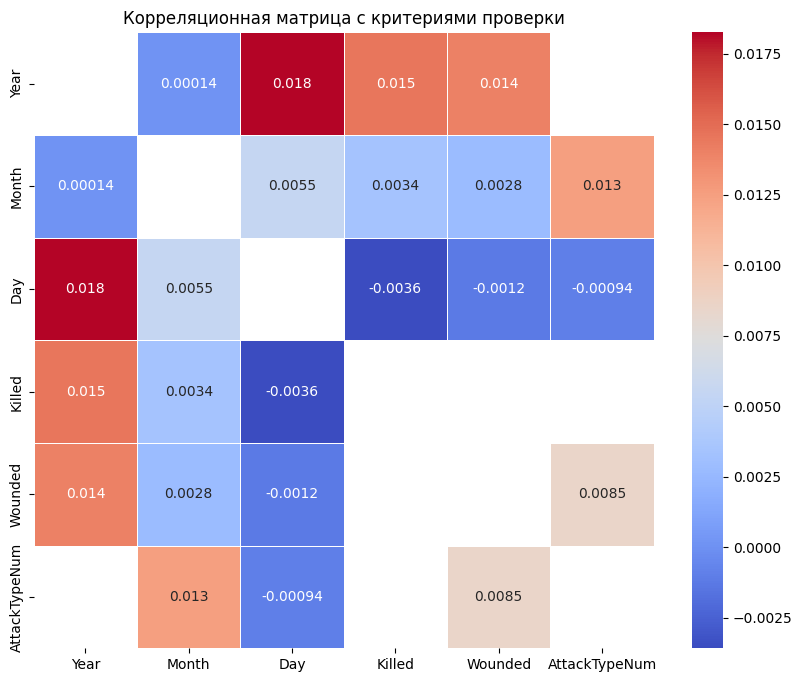

In [29]:
# Вычисляем корреляцию и p-значения
corr_matrix = df[columns_to_analyze].corr()
p_values = corr_matrix.copy()

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        _, p_value = spearmanr(df[corr_matrix.columns[i]], df[corr_matrix.columns[j]])
        p_values.loc[i,j] = p_value
        p_values.loc[j,i] = p_value

# Маска для значимых корреляций при alpha=0.05
alpha = 0.05
mask = np.abs(corr_matrix) > alpha
# Создаем heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)

# Добавляем заголовок
plt.title('Корреляционная матрица с критериями проверки')

# Показываем график
plt.show()

Мы выбрали ключевые переменные для анализа: год, месяц, день, тип атаки, убитые, раненые и тип атаки.

- Мы используем функцию spearmanr() из scipy.stats для вычисления Spearman's rho и соответствующих p-значений.
- P-значения вычисляются только для несимметричной части матрицы (нижняя треугольник), так как корреляции симметричны.
- Мы создаем маску mask, которая показывает только значимые корреляции (abs(корреляция) > alpha).
- В heatmap мы используем эту маску, чтобы скрыть не значимые корреляции.

## 4. Исследование количества жертв у разных целевых типов атак.

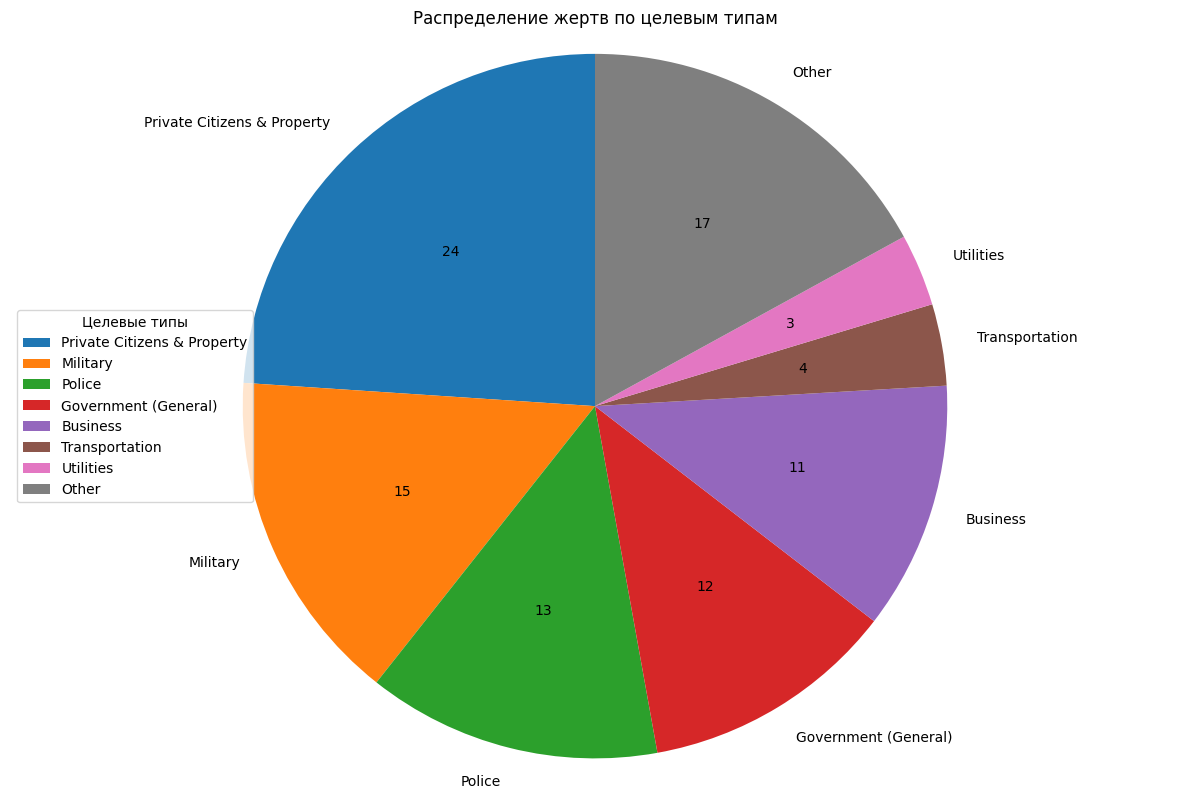

In [30]:
# Подсчитываем количество жертв для каждого целевого типа
target_counts = df['Target_type'].value_counts().reset_index()
target_counts.columns = ['Целевой тип', 'Количество жертв']

# Сортируем по убыванию количества жертв
target_counts = target_counts.sort_values('Количество жертв', ascending=False)

# Выбираем топ-7 секторов
top_8 = target_counts.head(7)

# Объединяем оставшиеся секторы в один
rest = target_counts.iloc[7:, 1].sum()
rest_sector = pd.DataFrame({'Целевой тип': ['Other'], 'Количество жертв': [rest]})
combined = pd.concat([top_8, rest_sector], ignore_index=True)

# Создаем круговую диаграмму
plt.figure(figsize=(12, 8))
wedges, texts, autotexts = plt.pie(combined['Количество жертв'], 
                                   labels=combined['Целевой тип'],
                                   autopct='%1.0f',
                                   startangle=90)

# Добавляем легенду
plt.legend(wedges, combined['Целевой тип'],
           title="Целевые типы",
           loc="center left")

# Устанавливаем заголовок и метки осей
plt.title('Распределение жертв по целевым типам')
plt.axis('equal')  # Это гарантирует, что круг будет кругом, а не эллипсом

# Отображаем график
plt.tight_layout()
plt.show()

In [31]:
target_counts = df.groupby('Target_type')['Killed'].sum().reset_index()
print("Подсчет жертв по целевым типам:")
print(target_counts)


Подсчет жертв по целевым типам:
                       Target_type         Killed
0                 Abortion Related      19.613089
1              Airports & Aircraft    4031.359953
2                         Business   27051.052819
3          Educational Institution    4175.185741
4             Food or Water Supply     406.727620
5          Government (Diplomatic)    3447.556291
6             Government (General)   28303.639965
7              Journalists & Media    2036.929723
8                         Maritime    1315.970160
9                         Military  111687.480085
10                             NGO    1210.809427
11                           Other     276.629451
12                          Police   55525.680402
13     Private Citizens & Property  146346.354958
14  Religious Figures/Institutions   13732.635216
15               Telecommunication     345.422516
16    Terrorists/Non-State Militia    9318.714141
17                        Tourists     803.662174
18                

Наибольшее количество жертв обнаружено у целевого типа 'Private Citizens & Property' с 140504 жертвами.

In [32]:
private_citizen_killed = df[df['Target_type'] == 'Private Citizens & Property']['Killed']
other_target_types_killed = df[df['Target_type'] != 'Private Citizens & Property']['Killed']

t_statistic, p_value = ttest_ind(private_citizen_killed, other_target_types_killed)

print(f"Т-тест статистика: {t_statistic}")
print(f"p-значение: {p_value}")

Т-тест статистика: 20.50482060588654
p-значение: 2.4887578300659466e-93


### Выводы

- Значение т-теста очень большое. Считается, что т-тест больше 2 или меньше -2 указывает на статистически значимое различие.

- Также, поскольку p-значение очень маленькое (меньше 0.05), мы можем с высокой степенью уверенности сказать, что различие между целевым типом "Private Citizens & Property" и другими целевыми типами действительно статистически значимо.

Это означает, что можно подтвердить гипотезу, что наибольшее количество жертв среди всех возможных целевых типов наблюдается при целевом типе "Частные лица". Можно утверждать, что при целевом типе "Private Citizens & Property" наблюдается наибольшее количество жертв среди всех возможных целевых типов. Статистическая значимость этого различия очень высока.